In [1]:
%matplotlib inline
import os
import sys

import pandas as pd
import numpy as np

BASE_PATH = os.path.dirname(os.getcwd())
sys.path.append(BASE_PATH)

import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from matplotlib import font_manager, rc


path = '/Users/suhye/Library/Fonts/NanumBarunGothic.otf'
font_name = font_manager.FontProperties(fname=path).get_name()

rc('font', family = 'AppleGothic')

In [4]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

In [14]:
IMAGE_HEIGHT = 36
IMAGE_WIDTH = 36
CHANNEL = 3
images = np.zeros((12159, 0))
train_images = []
for idx, image in enumerate(train_df['img_path']):
    image_path = os.path.join('../data/', image[2:])
    i = cv2.imread(image_path)
    train_images.append(np.expand_dims(i,0))

In [6]:
words = list(train_df['text'])

In [7]:
max_len = max([len(word) for word in words]) + 1
unicode_arr = np.ones(shape=(12159,max_len), dtype=np.int) * -1

for idx, text in enumerate(words):
    unicode_arr[idx, :len(text)] = np.array([ord(char) for char in text])
    unicode_arr[idx, len(text)] = ord('\n')
    
decode_inputs = np.roll(unicode_arr,1,axis=1)
decode_inputs[:,0] = ord('\n')
decode_inputs = decode_inputs.astype(np.int32)

/var/folders/7n/pm50m3212tq_hg29f8q2fdh00000gn/T/ipykernel_19500/3673430889.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  unicode_arr = np.ones(shape=(12159,max_len), dtype=np.int) * -1


In [8]:
X = {
    'images':images,
    'output_sequences':unicode_arr
}
train_gen = (X,)

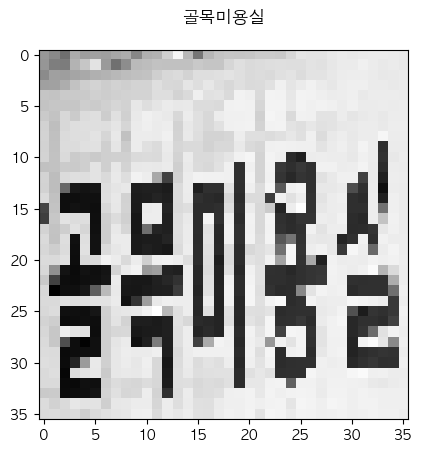

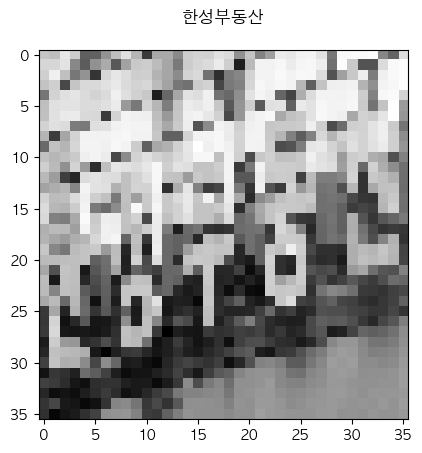

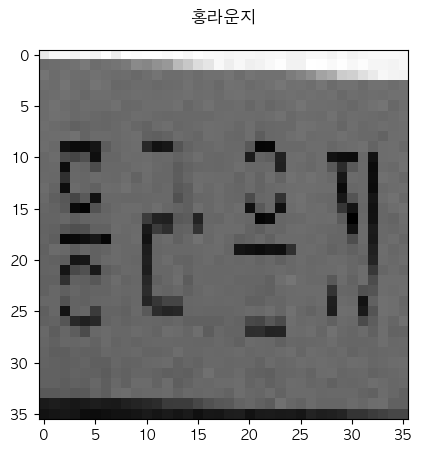

In [9]:
from models.jamo import compose_unicode

X = train_gen[0]
for i in range(3):
    image = X['images'][i,:,:,0]
    plt.title(compose_unicode(X['output_sequences'][i])[0])
    plt.imshow(image, cmap='gray')
    plt.show()